In [122]:
import re
import os 
from glob import glob
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import integrate
from scipy.signal import find_peaks

In [237]:
#读取单个的PE loop的文件
df = pd.read_csv(r'C:\PhD-Zipeng\Research projects\PUND\BF4 PUND PE Heating\360.05.tab',delimiter='\t',encoding= 'unicode_escape')
df.head(10)

,#Drive Voltage,E_SI,Measured Polarization,P_SI,Point,Time (ms)
0,-7.0190,-7.0190,-2.314750,-0.023148,1.0,0.05
1,-2.8229,-2.8229,-2.310897,-0.023109,2.0,0.10
2,3.5095,3.5095,-2.303527,-0.023035,3.0,0.15
3,-1.2207,-1.2207,-2.295486,-0.022955,4.0,0.20
4,2.6703,2.6703,-2.291298,-0.022913,5.0,0.25
5,3.1281,3.1281,-2.288115,-0.022881,6.0,0.30
6,2.3651,2.3651,-2.285100,-0.022851,7.0,0.35
7,3.6621,3.6621,-2.277226,-0.022772,8.0,0.40
8,7.5531,7.5531,-2.274546,-0.022745,9.0,0.45
9,6.0272,6.0272,-2.265668,-0.022657,10.0,0.50


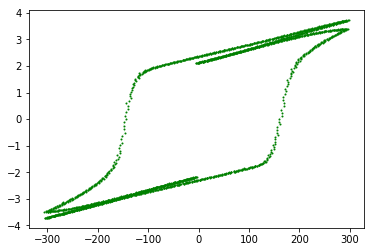

In [241]:
plt.plot(df['#Drive Voltage'], df['Measured Polarization'],'go--',linewidth=0.1, markersize=1)
plt.show()

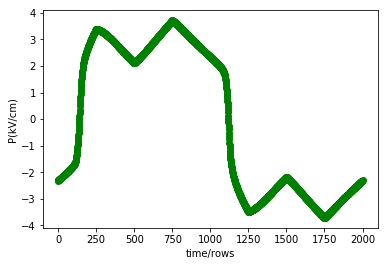

[ 251  750 1500]


In [133]:
# 提取出P值的plot,并且找到前两个peak，然后做差，即得出 delta P，which is from leakgae only
P_value = df['Measured Polarization']
# print(type(P_value))

plt.plot(P_value,'go--')
# plt.plot(-P_value,'ro--')#找到 负向电压的P的2个peak 
plt.xlabel('time/rows')
plt.ylabel('P(kV/cm)')
plt.show()
indices = find_peaks(P_value, prominence=1)[0]# find pea找到的是 【x,y】，而这里我只需要x, 所以用【0】index
print(indices)

# indices_2 = find_peaks(-P_value, prominence=1)[0]# find pea找到的是 【x,y】，而这里我只需要x, 所以用【0】index
# print(indices_2)

# df[250:260]
# 因为找到的峰不止一个，为了保险起见，我选择将图像分段，0-500和500-1000个点为区间，分别找peak

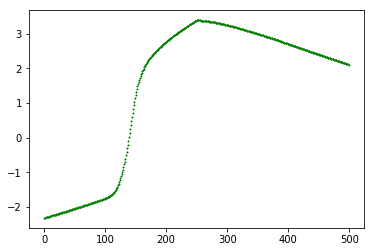

[251]


In [134]:
P_peak1 = P_value[0:500]
plt.plot(P_peak1, color='green', marker='+', linestyle='dashed',linewidth=0.1, markersize=2)
plt.show()
index1 = find_peaks(P_peak1, prominence = 1)[0]
print(index1)
# print(type(P_peak1))

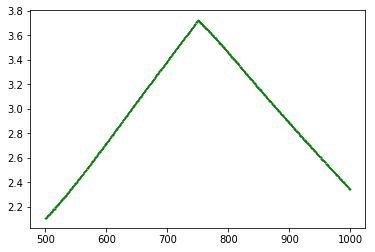

[750]


In [135]:
P_peak2 = P_value[500:1000]
plt.plot(P_peak2,color='green', marker='+', linestyle='dashed',linewidth=0.1, markersize=2)
plt.show()
index2 = find_peaks(P_peak2, prominence = 1)[0]+500  #要加上500，因为上一段有500个点
print(index2)

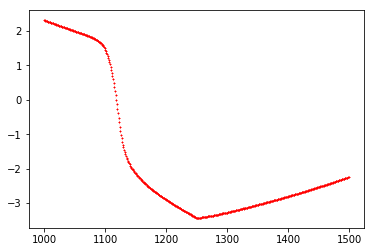

[1250]


In [216]:
P_peak3 = P_value[1000:1500]
plt.plot(P_peak3, color='red', marker='+', linestyle='dashed',linewidth=0.1, markersize=2)
plt.show()
index1 = find_peaks(-P_peak3, prominence = 1)[0]+1000
print(index1)
# print(type(P_peak1))

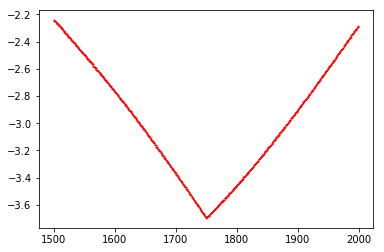

[1750]


In [217]:
P_peak4= P_value[1500:2000]
plt.plot(P_peak4,color='red', marker='+', linestyle='dashed',linewidth=0.1, markersize=2)
plt.show()
index2 = find_peaks(-P_peak4, prominence = 1)[0]+1500  #要加上500，因为上一段有500个点
print(index2)

In [136]:
# print(type(index2))
# print(index2[0])
delta_P=df.loc[index2[0],'Measured Polarization']-df.loc[index1[0],'Measured Polarization']

print(type(delta_P))
print('delta P from R = ',delta_P, 'uC/cm2')


<class 'numpy.float64'>
delta P from R =  0.330511 uC/cm2


# 对于 电阻而言
# I = U/R
# P = Q/Area = inte(Idt) /Area
# P = inte(U) / R* Area

# ΔP = 1/R*Area *  Δinte(U)

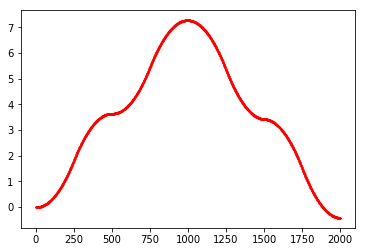

In [138]:
x = 0.001*df['Time (ms)'] # 乘 0.001 是为了把 （毫秒）变成（秒）
y = df['#Drive Voltage']
y_integration = integrate.cumtrapz(y, x, initial=0)
# print(y_integration)
plt.plot(y_integration, color='red', marker='o', linestyle='dashed',linewidth=0.1, markersize=1)
plt.show()

In [139]:
#插入voltage的积分这一列
df.insert(len(df.columns), "Voltage Integration(V*s)", y_integration)
df.head(10)

,#Drive Voltage,E_SI,Measured Polarization,P_SI,Point,Time (ms),Voltage Integration(V*s)
0,-7.0190,-7.0190,-2.314750,-0.023148,1.0,0.05,0.000000
1,-2.8229,-2.8229,-2.310897,-0.023109,2.0,0.10,-0.000246
2,3.5095,3.5095,-2.303527,-0.023035,3.0,0.15,-0.000229
3,-1.2207,-1.2207,-2.295486,-0.022955,4.0,0.20,-0.000172
4,2.6703,2.6703,-2.291298,-0.022913,5.0,0.25,-0.000135
5,3.1281,3.1281,-2.288115,-0.022881,6.0,0.30,0.000010
6,2.3651,2.3651,-2.285100,-0.022851,7.0,0.35,0.000147
7,3.6621,3.6621,-2.277226,-0.022772,8.0,0.40,0.000298
8,7.5531,7.5531,-2.274546,-0.022745,9.0,0.45,0.000578
9,6.0272,6.0272,-2.265668,-0.022657,10.0,0.50,0.000917


#  ΔP =  Δinte(U)/(R*Area )

In [140]:
#求出从peak1 到 peak2的voltage积分的差值
delta_V_integral = df.loc[index2[0],'Voltage Integration(V*s)']-df.loc[index1[0],'Voltage Integration(V*s)']
print(delta_V_integral)
one_over_AR = delta_P/delta_V_integral

# Sample area  = 2.42mm2 = 0.0242 cm2
# 1 C = 1 A * 1 S  库伦 =  安培 x 秒
resistance = (delta_V_integral)/(delta_P*0.0242*0.000001)

print(one_over_AR)
print('resistance = ', resistance,'ohm')    

3.6191730525
0.09132224273489614
resistance =  452489041.13692623 ohm


In [141]:
#with 1/AR, Volta_integration x 1/AR = 单纯电阻对 P 的贡献
P_fromR  = df['Voltage Integration(V*s)']*one_over_AR
# 把 P from R 的中心调到原点
P_fromR = P_fromR - 0.5*(max(P_fromR)+min(P_fromR))

df.insert(len(df.columns), "P from R", P_fromR)
df.head(10)

,#Drive Voltage,E_SI,Measured Polarization,P_SI,Point,Time (ms),Voltage Integration(V*s),P from R
0,-7.0190,-7.0190,-2.314750,-0.023148,1.0,0.05,0.000000,-0.313142
1,-2.8229,-2.8229,-2.310897,-0.023109,2.0,0.10,-0.000246,-0.313164
2,3.5095,3.5095,-2.303527,-0.023035,3.0,0.15,-0.000229,-0.313163
3,-1.2207,-1.2207,-2.295486,-0.022955,4.0,0.20,-0.000172,-0.313158
4,2.6703,2.6703,-2.291298,-0.022913,5.0,0.25,-0.000135,-0.313154
5,3.1281,3.1281,-2.288115,-0.022881,6.0,0.30,0.000010,-0.313141
6,2.3651,2.3651,-2.285100,-0.022851,7.0,0.35,0.000147,-0.313128
7,3.6621,3.6621,-2.277226,-0.022772,8.0,0.40,0.000298,-0.313115
8,7.5531,7.5531,-2.274546,-0.022745,9.0,0.45,0.000578,-0.313089
9,6.0272,6.0272,-2.265668,-0.022657,10.0,0.50,0.000917,-0.313058


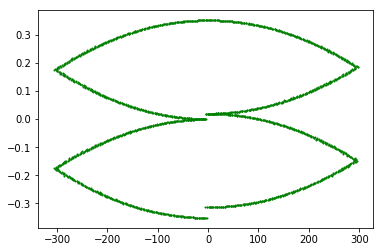

In [143]:
plt.plot(df['#Drive Voltage'], df['P from R'], color='green', marker='o', linestyle='dashed',linewidth=0.1, markersize=1)
# plt.plot(df['#Drive Voltage'], df['Corrected P'], color='red', marker='o', linestyle='dashed',linewidth=0.1, markersize=1)
# plt.plot(df['#Drive Voltage'], df['Measured Polarization'], color='blue', marker='+', linestyle='dashed',linewidth=0.1, markersize=1)
plt.show()

plt.plot( df['Corrected P'], color='red', marker='o', linestyle='dashed',linewidth=1, markersize=1, label='Model length')
plt.plot( df['Measured Polarization'], color='blue', marker='+', linestyle='dashed',linewidth=1, markersize=1)
plt.plot(df['P from R'], color='green', marker='o', linestyle='dashed',linewidth=1, markersize=1)

plt.legend(['Corrected P', 'Measured', 'PfromR'],loc='upper right', shadow=True, fontsize='large')
plt.show()

plt.plot( df['P from R'], color='green', marker='o', linestyle='dashed',linewidth=0.1, markersize=1)
plt.plot(0.003*df['#Drive Voltage'], color='red', marker='o', linestyle='dashed',linewidth=0.1, markersize=1)

plt.show()

C:\Users\Dev\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Dev\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


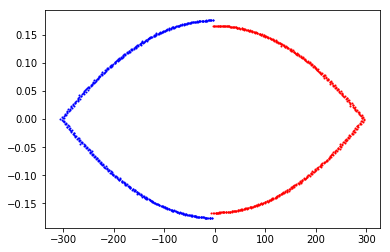

New length =  1000 (lines)


,#Drive Voltage,E_SI,Measured Polarization,P_SI,Point,Time (ms),Voltage Integration(V*s),P from R
0,-7.0190,-7.0190,-2.314750,-0.023148,1.0,0.05,0.000000,-0.166263
1,-2.8229,-2.8229,-2.310897,-0.023109,2.0,0.10,-0.000246,-0.166286
2,3.5095,3.5095,-2.303527,-0.023035,3.0,0.15,-0.000229,-0.166284
3,-1.2207,-1.2207,-2.295486,-0.022955,4.0,0.20,-0.000172,-0.166279
4,2.6703,2.6703,-2.291298,-0.022913,5.0,0.25,-0.000135,-0.166276


In [154]:
#剔除重叠的部分，删除500-1000行 以及 1500-2000行
# 创建了 New_dataframe 来装删除后的data
P_positivepart= df.iloc[0:500]
P_negativepart= df.iloc[1000:1500]

#调到原点
P_positivepart['P from R'] = P_positivepart['P from R'] - 0.5*(max(P_positivepart['P from R'])+min(P_positivepart['P from R']))
P_negativepart['P from R'] = P_negativepart['P from R'] - 0.5*(max(P_negativepart['P from R'])+min(P_negativepart['P from R']))#- (df.loc[1000, 'P from R'] -df.loc[0, 'P from R'])

plt.plot(P_positivepart['#Drive Voltage'], P_positivepart['P from R'], color='red', marker='o', linestyle='dashed',linewidth=0.1, markersize=1)
plt.plot(P_negativepart['#Drive Voltage'], P_negativepart['P from R'], color='blue', marker='o', linestyle='dashed',linewidth=0.1, markersize=1)
plt.show()

# 拼接前后2个部分
New_df = P_positivepart.append(P_negativepart)
print('New length = ',len(New_df),'(lines)',)# 确认length是不是1000，删除前是2000
New_df.head(5)

In [155]:
#用测量的 P 减去 P from R，即得到 P without conduction
P_corrected =New_df['Measured Polarization']-New_df['P from R']
New_df.insert(len(df.columns), "Corrected P", P_corrected)
New_df.head(5)

,#Drive Voltage,E_SI,Measured Polarization,P_SI,Point,Time (ms),Voltage Integration(V*s),P from R,Corrected P
0,-7.0190,-7.0190,-2.314750,-0.023148,1.0,0.05,0.000000,-0.166263,-2.148487
1,-2.8229,-2.8229,-2.310897,-0.023109,2.0,0.10,-0.000246,-0.166286,-2.144611
2,3.5095,3.5095,-2.303527,-0.023035,3.0,0.15,-0.000229,-0.166284,-2.137243
3,-1.2207,-1.2207,-2.295486,-0.022955,4.0,0.20,-0.000172,-0.166279,-2.129207
4,2.6703,2.6703,-2.291298,-0.022913,5.0,0.25,-0.000135,-0.166276,-2.125022


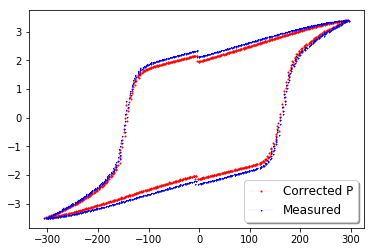

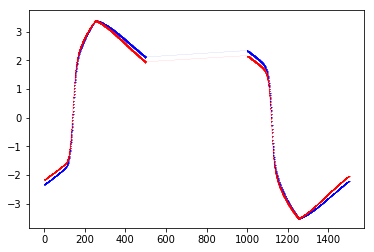

In [157]:
plt.plot(New_df['#Drive Voltage'], New_df['Corrected P'], color='red', marker='o', linestyle='dashed',linewidth=0.1, markersize=1)
plt.plot(New_df['#Drive Voltage'], New_df['Measured Polarization'], color='blue', marker='+', linestyle='dashed',linewidth=0.1, markersize=1)

plt.legend(['Corrected P', 'Measured', 'PfromR'],loc='lower right', shadow=True, fontsize='large')

# plt.axis([-10,30,-1,1])

plt.show()

plt.plot(New_df.loc[0:1500,'Measured Polarization'], color='blue', marker='+', linestyle='dashed',linewidth=0.1, markersize=1)
plt.plot(New_df.loc[0:1500,'Corrected P'], color='red', marker='+', linestyle='dashed',linewidth=0.1, markersize=1)
#plt.plot(New_df['Corrected P'], color='red', marker='+', linestyle='dashed',linewidth=0.1, markersize=1)

plt.show()

# centering Measured_P and Corrected_P

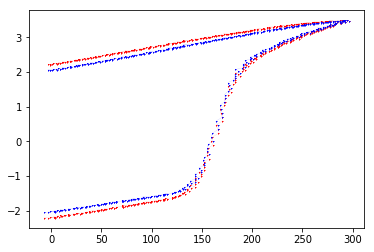

In [163]:
center_MP = New_df.loc[0:500,'Measured Polarization']-0.5*(New_df.loc[0,'Measured Polarization']+ New_df.loc[499,'Measured Polarization'])
plt.plot(New_df.loc[0:500,'#Drive Voltage'],center_MP, color='red', marker='+', linestyle='dashed',linewidth=0.1, markersize=1)

center_CP = New_df.loc[0:500,'Corrected P']-0.5*(New_df.loc[0,'Corrected P']+ New_df.loc[499,'Corrected P'])
plt.plot(New_df.loc[0:500,'#Drive Voltage'],center_CP, color='blue', marker='+', linestyle='dashed',linewidth=0.1, markersize=1)

# plt.axis([-10,30,-1,1])
plt.show()

In [164]:
#centering the 2nd half
center_MP2 = New_df.loc[1000:1500,'Measured Polarization'] - (New_df.loc[1000,'Measured Polarization'] - center_MP[499])
center_CP2 = New_df.loc[1000:1500,'Corrected P'] - (New_df.loc[1000,'Corrected P'] - center_CP[499])

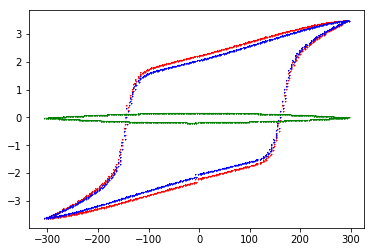

In [170]:

plt.plot(New_df.loc[0:500,'#Drive Voltage'],center_MP, color='red', marker='+', linestyle='dashed',linewidth=0.1, markersize=1)
plt.plot(New_df.loc[0:500,'#Drive Voltage'],center_CP, color='blue', marker='+', linestyle='dashed',linewidth=0.1, markersize=1)

plt.plot(New_df.loc[1000:1500,'#Drive Voltage'],center_MP2, color='red', marker='+', linestyle='dashed',linewidth=0.1, markersize=1)
plt.plot(New_df.loc[1000:1500,'#Drive Voltage'],center_CP2, color='blue', marker='+', linestyle='dashed',linewidth=0.1, markersize=1)

# centering 后的 P_fromR 可以有centering 后的 Measured_P 和 Corrected_P 做差得到
plt.plot(New_df.loc[0:500,'#Drive Voltage'],center_MP-center_CP, color='green', marker='+', linestyle='dashed',linewidth=0.1, markersize=1)
plt.plot(New_df.loc[1000:1500,'#Drive Voltage'],center_MP2-center_CP2, color='green', marker='+', linestyle='dashed',linewidth=0.1, markersize=1)

# plt.axis([-10,30,-1,1])
plt.show()

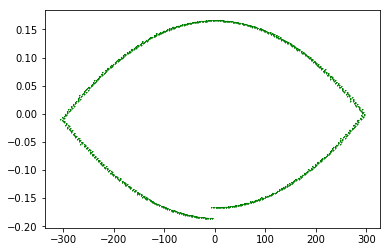

In [171]:
# centering 后的 P_fromR 可以有centering 后的 Measured_P 和 Corrected_P 做差得到
plt.plot(New_df.loc[0:500,'#Drive Voltage'],center_MP-center_CP, color='green', marker='+', linestyle='dashed',linewidth=0.1, markersize=1)
plt.plot(New_df.loc[1000:1500,'#Drive Voltage'],center_MP2-center_CP2, color='green', marker='+', linestyle='dashed',linewidth=0.1, markersize=1)

plt.show()

In [188]:
# 建立新的dataframe,拼接
MP = center_MP.append(center_CP2)
CP = center_CP.append(center_CP2)
DriveVol = New_df.loc[0:500,'#Drive Voltage'].append(New_df.loc[1000:1500,'#Drive Voltage'])
PfromR = MP - CP
E_SI = DriveVol/(250*0.000001)
time = New_df.loc[0:500,'Time (ms)'].append(New_df.loc[1000:1500,'Time (ms)'])

dictionary={"E_SI":E_SI,
"Measured Polarization":MP,
"Corrected P":CP,
"P from R":PfromR,
"Drive Voltage":DriveVol,
"Time (ms)":time
           }
Centerred_df=pd.DataFrame(dictionary)
print(Centerred_df.shape)
Centerred_df.head(10)

# MP.head(10)
# plt.plot(DriveVol, color='green', marker='+', linestyle='dashed',linewidth=0.1, markersize=1)

# plt.show()
# print(len(DriveVol))
# print(len(MP))

(1000, 6)


,Corrected P,Drive Voltage,E_SI,Measured Polarization,P from R,Time (ms)
0,-2.047388,-7.0190,-28076.0,-2.213653,-0.166265,0.05
1,-2.043513,-2.8229,-11291.6,-2.209801,-0.166288,0.10
2,-2.036145,3.5095,14038.0,-2.202430,-0.166286,0.15
3,-2.028109,-1.2207,-4882.8,-2.194389,-0.166281,0.20
4,-2.023924,2.6703,10681.2,-2.190201,-0.166277,0.25
5,-2.020754,3.1281,12512.4,-2.187019,-0.166264,0.30
6,-2.017752,2.3651,9460.4,-2.184003,-0.166252,0.35
7,-2.009892,3.6621,14648.4,-2.176129,-0.166238,0.40
8,-2.007237,7.5531,30212.4,-2.173449,-0.166212,0.45
9,-1.998390,6.0272,24108.8,-2.164572,-0.166181,0.50


In [189]:
#从文件名提取温度with regular expression
path = r'C:\\PhD-Zipeng\\Research projects\\PUND\\BF4 PUND PE Heating'
files = os.listdir(path)
temperature = list()
for file in files:
    if file.endswith(".tab"):
        num = re.findall(r"\d+.\d+", file)
        temperature.append(float(num[0]))
print(temperature)

[359.93, 360.05, 360.41, 360.8, 361.17, 361.4, 361.72, 362.03, 362.38, 362.65, 363.04, 363.37, 363.62, 363.96, 364.16, 364.54, 364.75, 364.92, 365.18, 365.41, 365.69, 365.92, 366.19, 366.35, 366.65, 366.91, 367.12, 367.4, 367.63, 367.89, 368.17, 368.4, 368.64, 368.88, 369.1, 369.37, 369.61, 369.91, 370.14, 370.39, 370.58, 370.89, 371.11, 371.37, 371.62, 371.83, 372.08, 372.33, 372.6, 372.82, 373.06, 373.35, 373.53, 373.79, 374.06, 374.3, 374.57, 374.79, 375.07, 375.27, 375.55, 375.77, 376.04, 376.31, 376.47, 376.82, 377.08, 377.25, 377.52, 377.9, 378.06, 378.34, 378.62, 378.88, 379.02, 379.25, 379.64, 379.79, 380.06, 380.29, 380.54, 380.79, 381.0, 381.36, 381.54, 381.84, 381.99, 382.38, 382.46, 382.79, 383.06, 383.32, 383.51, 383.8, 384.01, 384.35, 384.43, 384.8, 384.98, 385.23, 385.44, 385.74, 385.99, 386.22, 386.5, 386.64, 386.96, 387.2, 387.53, 387.73, 387.89, 388.26, 388.44, 388.7, 388.92, 389.22, 389.4, 389.61, 389.96, 390.13, 390.43, 390.63, 390.88, 391.16, 391.39, 391.69, 391.87

In [224]:
#批量操作所有文件
path = 'C:\\PhD-Zipeng\\Research projects\\PUND\\BF4 PUND PE Heating'
output_path = 'C:\\PhD-Zipeng\\Research projects\\DABCO\\BF4\\No16_PUND'
files = glob(path + "/*.tab")

lst_R=list()
lst_R2=list()
lst_T=list()
lst_Pshift=list()
lst_Pshift2=list()
i = 0

for file in files:
    df = pd.read_csv(file,delimiter='\t',encoding= 'unicode_escape')
    P_value = df['Measured Polarization']
    P_peak1 = P_value[0:500]
    index1 = find_peaks(P_peak1, prominence = 1)[0]
    P_peak2 = P_value[500:1000]
    index2 = find_peaks(P_peak2, prominence = 1)[0]+500
    P_peak3 = P_value[1000:1500]
    index3 = find_peaks(-P_peak3, prominence = 1)[0]+1000
    P_peak4 = P_value[1500:2000]
    index4 = find_peaks(-P_peak4, prominence = 1)[0]+1500
    
    ##插入voltage 积分
    x = 0.001*df['Time (ms)']
    y = df['#Drive Voltage']
    y_integration = integrate.cumtrapz(y, x, initial=0)
    df.insert(len(df.columns), "Voltage Integration", y_integration)
    ##计算 V inte, R, 1/Area*R
    delta_V_integral = df.ix[index2[0],'Voltage Integration']-df.ix[index1[0],'Voltage Integration']
    delta_V_integral2 = df.ix[index4[0],'Voltage Integration']-df.ix[index3[0],'Voltage Integration']
    delta_P=df.ix[index2[0],'Measured Polarization']-df.ix[index1[0],'Measured Polarization']
    delta_P2=df.ix[index4[0],'Measured Polarization']-df.ix[index3[0],'Measured Polarization']
    one_over_AR = delta_P/delta_V_integral
    resistance = (delta_V_integral)/(delta_P*0.0242*0.000001)
    resistance2 = (delta_V_integral2)/(delta_P2*0.0242*0.000001)
    
    #计算P from R 然后 Centering
    P_fromR  = df['Voltage Integration']*one_over_AR
    P_fromR = P_fromR - 0.5*(max(P_fromR)+min(P_fromR))
    df.insert(len(df.columns), "P from R", P_fromR)
    
    #剔除重叠的部分，删除500-1000行 以及 1500-2000行
    P_positivepart= df.iloc[0:500]
    P_negativepart= df.iloc[1000:1500]
    
    #调到原点
    P_positivepart['P from R'] = P_positivepart['P from R'] - 0.5*(max(P_positivepart['P from R'])+min(P_positivepart['P from R']))
    P_negativepart['P from R'] = P_negativepart['P from R'] - 0.5*(max(P_negativepart['P from R'])+min(P_negativepart['P from R']))#- (df.loc[1000, 'P from R'] -df.loc[0, 'P from R'])
    
    #创建了 New_dataframe 来装删除后的data
    New_df = P_positivepart.append(P_negativepart)
    
    #计算corrected P
    P_corrected =New_df['Measured Polarization']-New_df['P from R']
    New_df.insert(len(df.columns), "Corrected P", P_corrected)
    
    #centering Measured and Corrected P
    center_MP = New_df.loc[0:500,'Measured Polarization']-0.5*(New_df.loc[0,'Measured Polarization']+ New_df.loc[499,'Measured Polarization'])
    center_CP = New_df.loc[0:500,'Corrected P']-0.5*(New_df.loc[0,'Corrected P']+ New_df.loc[499,'Corrected P'])
    #centering the 2nd half
    center_MP2 = New_df.loc[1000:1500,'Measured Polarization'] - (New_df.loc[1000,'Measured Polarization'] - center_MP[499])
    center_CP2 = New_df.loc[1000:1500,'Corrected P'] - (New_df.loc[1000,'Corrected P'] - center_CP[499])
    # 建立新的dataframe,拼接
    MP = center_MP.append(center_MP2)
    CP = center_CP.append(center_CP2)
    DriveVol = New_df.loc[0:500,'#Drive Voltage'].append(New_df.loc[1000:1500,'#Drive Voltage'])
    PfromR = MP - CP
    E_SI = DriveVol/(250*0.000001)
    time = New_df.loc[0:500,'Time (ms)'].append(New_df.loc[1000:1500,'Time (ms)'])

    dictionary={"E_SI":E_SI,
    "Measured Polarization":MP,
    "Corrected P":CP,
    "P from R":PfromR,
    "Drive Voltage":DriveVol,
    "Time (ms)":time
               }
    Centerred_df=pd.DataFrame(dictionary)
    print(Centerred_df.shape)
    Centerred_df.head(10)
    
    #输出center后的 dataframe
#     file_name = output_path +'\\'+ str(temperature[i])+'.csv'
#     Centerred_df.to_csv(file_name, index=None)
    
    #记录每个PE loop的 resistance value
    lst_R.append(resistance)
    lst_R2.append(resistance2)
    lst_T.append(temperature[i])
    lst_Pshift.append(delta_P)
    lst_Pshift2.append(delta_P2)
    i = i+1
    
    
# print(lst_AR)
# print(lst_T)
# print(lst_Pshift)

#将list转化成dictionary，然后转化成DataFrame
dic={"Resistance value":lst_R,
     "Resistance value_2nd":lst_R2,
  "T":lst_T,
  "delta P(uC/cm2)":lst_Pshift,
     "delta P_2nd(uC/cm2)":lst_Pshift2}
dt=pd.DataFrame(dic)


C:\Users\Dev\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\Dev\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Dev\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)
(1000, 6)


   Resistance value  Resistance value_2nd       T  delta P(uC/cm2)  \
0      4.071476e+08          6.003992e+08  359.93         0.366192   
1      4.524890e+08          6.805183e+08  360.05         0.330511   
2      3.897574e+08          5.815637e+08  360.41         0.382441   

   delta P_2nd(uC/cm2)  
0            -0.264845  
1            -0.233351  
2            -0.273220  


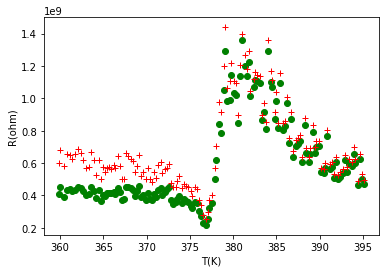

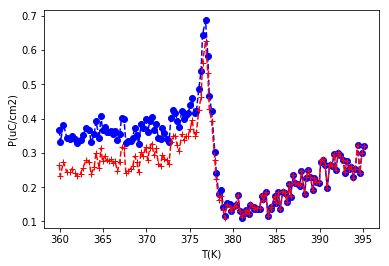

In [236]:
print(dt.head(3))
plt.figure()
plt.plot(dt['T'],dt['Resistance value'],'go')
plt.plot(dt['T'],dt['Resistance value_2nd'],'r+')
plt.xlabel('T(K)')
plt.ylabel('R(ohm)')
plt.ticklabel_format(style='sci', axis='y')
# plt.axis([377,395,0,1600000000])

plt.figure()
plt.plot(dt['T'],dt['delta P(uC/cm2)'],'bo--') 
plt.plot(dt['T'],-dt['delta P_2nd(uC/cm2)'],'r+--') 
plt.xlabel('T(K)')
plt.ylabel('P(uC/cm2)')
# plt.axis([-10,30,-1,1])
plt.show()